# Visualisation de séries temporelles

## Préliminaires

La fonction de *Seaborn* que l'on va utiliser génère des figures dont les dimensions sont contrôlées par *Matplotlib* :

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

## Chargement de données
On va utiliser le jeu de données d'exemples *flight* de *Seaborn*. (Si un proxy empêche le chargement du jeu de données cf. infra)

In [3]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

## Chargement par Pandas
Si nécessaire (proxy…), télécharger le fichier à l'URL ci-dessous et charger le fichier **local**.

In [37]:
import pandas as pd
flights = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

## Série temporelle : relation entre une valeur et une date

Représentation visuelle d'une continuité entre les date

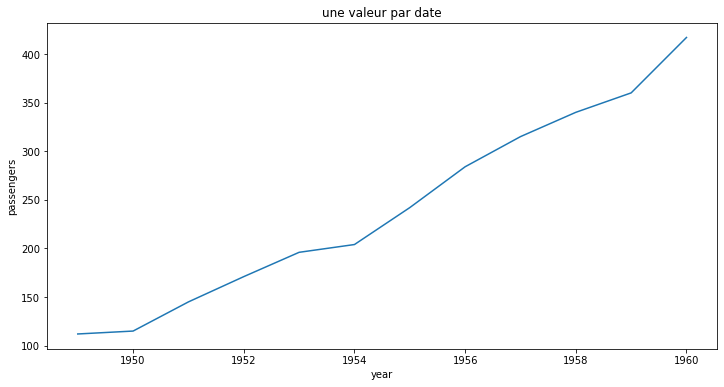

In [61]:
sns.lineplot(data=flights[flights["month"]== "January"], x="year", y="passengers").set_title("une valeur par date");

Lorsque la DataFrame contient plusieurs valeurs pour une même date, on peut superposer les représentations et les distinguer avec la couleur

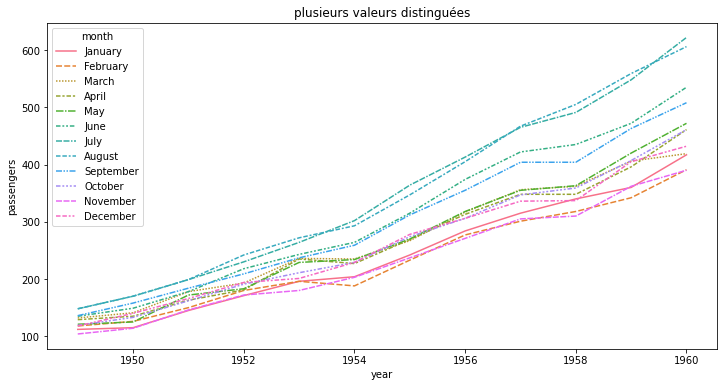

In [62]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month").set_title("plusieurs valeurs distinguées");

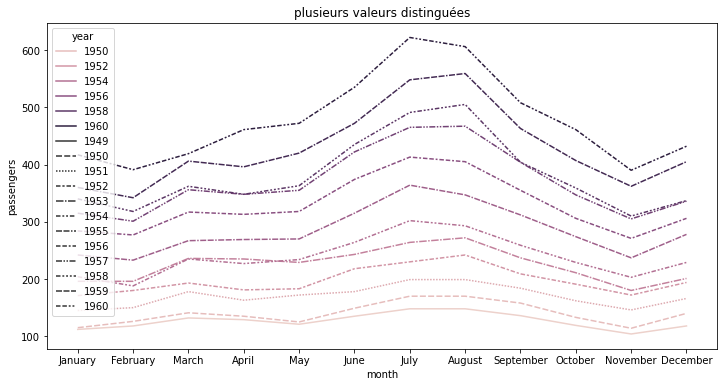

In [63]:
sns.lineplot(data=flights, x="month", y="passengers", hue="year", style="year").set_title("plusieurs valeurs distinguées");

Lorsqu'on a plusieurs valeurs pour une même date, on peut aussi représenter la distribution des valeurs pour chaque date avec un intervalle de confiance.

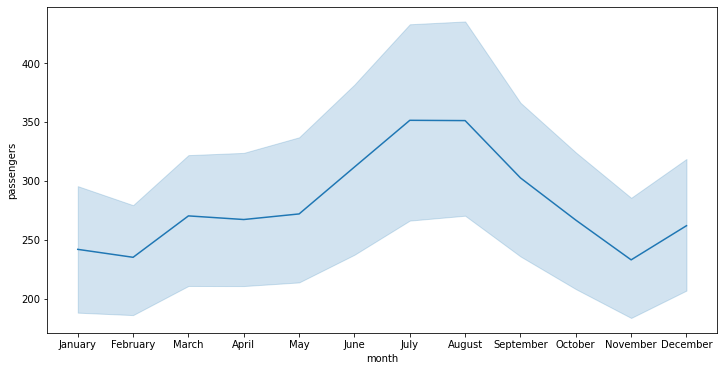

In [64]:
sns.lineplot(data=flights, x="month", y="passengers");

## Index de dates

Pour manipuler des séries temporelles, il sera très pratique de mettre un index temporel.

On peut créer des colonnes de dates à la lecture ou a posteriori:

In [68]:
flights['date']=pd.to_datetime(flights['year'].astype(str)  + flights['month'], format='%Y%B')

On peut ensuite mettre une colonne en index :

In [81]:
flights=flights.set_index('date');

`.loc` permet ensuite de sélectionner facilement des intervalles de temps :

In [82]:
flights.loc['1955-04':]

year      month  passengers
date                                   
1955-04-01  1955      April         269
1955-05-01  1955        May         270
1955-06-01  1955       June         315
1955-07-01  1955       July         364
1955-08-01  1955     August         347
...          ...        ...         ...
1960-08-01  1960     August         606
1960-09-01  1960  September         508
1960-10-01  1960    October         461
1960-11-01  1960   November         390
1960-12-01  1960   December         432

[69 rows x 3 columns]

Seaborn peut utiliser des dates en abscisse :

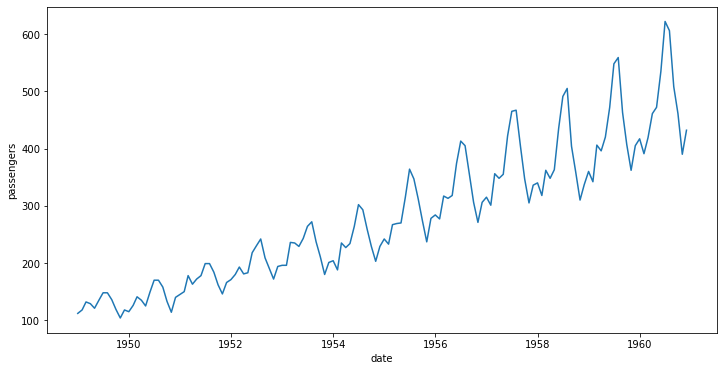

In [83]:
sns.lineplot(data=flights, x="date", y="passengers");

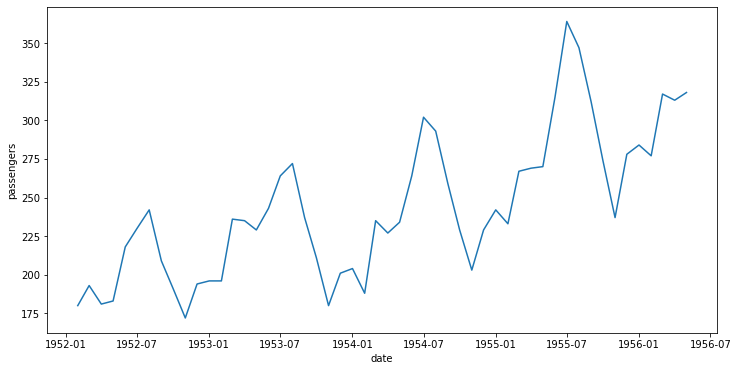

In [84]:
sns.lineplot(data=flights.loc['1952-02':'1956-05'], x="date", y="passengers");